In [ ]:
#import các thư viện cần thiết
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math

Câu 1: Sử dụng Parzen Window

In [ ]:
#load dataset lên dataframe và đặt tên cho cột
columnsName = ['Feature1','Feature2']
A = open("/content/drive/My Drive/Nhận dạng mẫu/BaiThucHanh4/classA.txt", "r",encoding='utf-8')
classA = pd.DataFrame(np.array(A.read().split()).astype('float64').reshape(-1,2),columns = columnsName)
classA.head()

,Feature1,Feature2
0,8.163200,1.882447
1,7.022303,3.101321
2,8.427595,2.285227
3,8.304689,1.779331
4,8.403989,1.986639


In [ ]:
len(classA)

76

In [ ]:
B = open("/content/drive/My Drive/Nhận dạng mẫu/BaiThucHanh4/classB.txt", "r",encoding='utf-8')
classB = pd.DataFrame(np.array(B.read().split()).astype('float64').reshape(-1,2),columns = columnsName)
classB.head()

,Feature1,Feature2
0,-4.904201,3.633286
1,2.016829,8.001914
2,-0.643957,8.425947
3,-4.170521,3.586681
4,-4.938366,3.189906


In [ ]:
len(classB)

140

In [ ]:
#gán nhãn cho classA và classB với các nhãn tương ứng là A và B
classA['Label'] = 'A'
classB['Label'] = 'B'

In [ ]:
classA.head()

,Feature1,Feature2,Label
0,8.163200,1.882447,A
1,7.022303,3.101321,A
2,8.427595,2.285227,A
3,8.304689,1.779331,A
4,8.403989,1.986639,A


In [ ]:
classB.head()

,Feature1,Feature2,Label
0,-4.904201,3.633286,B
1,2.016829,8.001914,B
2,-0.643957,8.425947,B
3,-4.170521,3.586681,B
4,-4.938366,3.189906,B


In [ ]:
#chia dataset thành 70% train và 30% test
train_A, test_A = train_test_split(classA,train_size = 0.7)
train_B, test_B = train_test_split(classB,train_size = 0.7)

In [ ]:
train_A.shape,test_A.shape,train_B.shape,test_B.shape

((53, 3), (23, 3), (98, 3), (42, 3))

In [ ]:
train = pd.concat([train_A,train_B])
test = pd.concat([test_A,test_B])

In [ ]:
train.shape,test.shape

((151, 3), (65, 3))

In [ ]:
h = 1
def hypercube(X, Xi):
    if abs(np.linalg.norm(X-Xi)) > h/2:
        return 0
    return 1
def PW(X,data_train_A,data_train_B):
    phi_B = 0
    p_B = 0
    k_B = 0
    for j in range(len(data_train_B)):
        y = data_train_B.iloc[:,:-1].values[j]
        k_B+=hypercube(X,y.reshape(-1,1))
    p_B =k_B/(len(data_train_B)*math.pow(h,2))
    
    phi_A = 0
    p_A = 0
    k_A = 0
    for i in range(len(data_train_A)):
        x = data_train_A.iloc[:,:-1].values[i]
        k_A+=hypercube(X,x.reshape(-1,1))
    p_A =k_A/(len(data_train_A)*math.pow(h,2))
    if p_A > p_B:
        return "A"
    else:
        return "B"

In [ ]:
#sử dụng hàm PW để phân loại dữ liệu test và hiển thị confusion matrix với h=1
predict = []
for x,y in test[['Feature1','Feature2']].values:
    predict.append(PW(np.array([x,y]).reshape(-1,1),train_A,train_B))

In [ ]:
print(predict[:-10])

['A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [ ]:
#Với h = 1
print(pd.DataFrame(confusion_matrix(test.iloc[:,2], predict), index=['Class A', 'Class B'], columns=['Class A', 'Class B']))

         Class A  Class B
Class A       12       11
Class B        1       41


In [ ]:
#Với h = 0.5
print(pd.DataFrame(confusion_matrix(test.iloc[:,2], predict), index=['Class A', 'Class B'],
                   columns=['Class A', 'Class B']))

         Class A  Class B
Class A        7       16
Class B        1       41


In [ ]:
#Với h = 1.5
print(pd.DataFrame(confusion_matrix(test.iloc[:,2], predict), index=['Class A', 'Class B'], columns=['Class A', 'Class B']))

         Class A  Class B
Class A       13       10
Class B        2       40


Câu 2: Sử dụng hàm cửa sổ Gauss

In [ ]:
h = 1
def hypercube_gauss(x,xi):
  return math.exp(-np.transpose(x)@xi)/2

def PW2(X,data_train_A,data_train_B):
    phi_B = 0
    p_B = 0
    k_B = 0
    for j in range(len(data_train_B)):
        y = data_train_B.iloc[:,:-1].values[j]
        k_B+=hypercube_gauss(X,y.reshape(-1,1))
    p_B =k_B/(len(data_train_B)*math.pow(h,2))
    
    phi_A = 0
    p_A = 0
    k_A = 0
    for i in range(len(data_train_A)):
        x = data_train_A.iloc[:,:-1].values[i]
        k_A+=hypercube_gauss(X,x.reshape(-1,1))
    p_A =k_A/(len(data_train_A)*math.pow(h,2))
    if p_A > p_B:
        return "A"
    else:
        return "B"

In [ ]:
predict1 = []
for x,y in test[['Feature1','Feature2']].values:
    predict1.append(PW2(np.array([x,y]).reshape(-1,1),train_A,train_B))

In [ ]:
#Với h = 1
print(pd.DataFrame(confusion_matrix(test.iloc[:,2], predict1), index=['Class A', 'Class B'], 
                   columns=['Class A', 'Class B']))

         Class A  Class B
Class A        3       20
Class B       39        3


Câu 3:Xây dựng bộ phân lớp để nhận dạng chữ số.

In [ ]:
path = '/content/drive/MyDrive/Nhận dạng mẫu/BaiThucHanh4/'
class0 = pd.read_csv(path+'Class0.txt',header = None,sep='\s+')
class1 = pd.read_csv(path+'Class1.txt',header = None,sep='\s+')
class2 = pd.read_csv(path+'Class2.txt',header = None,sep='\s+')
class3 = pd.read_csv(path+'Class3.txt',header = None,sep='\s+')
class4 = pd.read_csv(path+'Class4.txt',header = None,sep='\s+')
class5 = pd.read_csv(path+'Class5.txt',header = None,sep='\s+')
class6 = pd.read_csv(path+'Class6.txt',header = None,sep='\s+')
class7 = pd.read_csv(path+'Class7.txt',header = None,sep='\s+')
class8 = pd.read_csv(path+'Class8.txt',header = None,sep='\s+')
class9 = pd.read_csv(path+'Class9.txt',header = None,sep='\s+')

In [ ]:
len(class0),len(class1),len(class2),len(class3),len(class4),len(class5),len(class6),len(class7),len(class8),len(class9)

(2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400)

In [ ]:
class0[24:48][:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
26,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0
27,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0
28,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0
29,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0
30,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
31,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
32,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0
33,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0


In [ ]:
#Với mỗi 24row và 18 column ta sẽ được một hình ảnh chữ số tương ứng với của mỗi lớp.
def tach_du_lieu(data_input):
  n = len(data_input)
  total_pattern = n//24
  data_output = []
  for i in range(total_pattern):
    data = data_input[i*24 : (i+1)*24][:]
    data_output.append(data.values)
  return data_output

In [ ]:
#Kích thước và số lượng còn lại của mỗi lớp sau khi tách
data0 = tach_du_lieu(class0)
print("Class_0",len(data0))
print(data0[0].shape)
data1 = tach_du_lieu(class1)
print("Class_1",len(data1))
print(data1[0].shape)
data2 = tach_du_lieu(class2)
print("Class_2",len(data2))
print(data2[0].shape)
data3 = tach_du_lieu(class3)
print("Class_3",len(data3))
print(data3[0].shape)
data4 = tach_du_lieu(class4)
print("Class_4",len(data4))
print(data4[0].shape)
data5 = tach_du_lieu(class5)
print("Class_5",len(data5))
print(data5[0].shape)
data6 = tach_du_lieu(class6)
print("Class_6",len(data6))
print(data6[0].shape)
data7 = tach_du_lieu(class7)
print("Class_7",len(data7))
print(data7[0].shape)
data8 = tach_du_lieu(class8)
print("Class_8",len(data8))
print(data8[0].shape)
data9 = tach_du_lieu(class9)
print("Class_9",len(data9))
print(data9[0].shape)

Class_0 100
(24, 18)
Class_1 100
(24, 18)
Class_2 100
(24, 18)
Class_3 100
(24, 18)
Class_4 100
(24, 18)
Class_5 100
(24, 18)
Class_6 100
(24, 18)
Class_7 100
(24, 18)
Class_8 100
(24, 18)
Class_9 100
(24, 18)


In [ ]:
#Tập hợp dữ liệu.
data = pd.concat([class0,class1,class2,class3,class4,class5,class6,class7,class8,class9])

In [ ]:
len(data)

24000

In [ ]:
def hepercube_1(X, Xi, h):
  if abs(np.linalg.norm(X-Xi)) > h/2:
    return 0
  return 1

In [ ]:
def phi(X, X_train, h):
  phi = 0
  for i in range(0, 75): #tam train cua moi lop co 75 phan tu
    phi = phi + hepercube_1(X, X_train[i], h)
  return phi

In [ ]:
def pw(X, X_train, h): #mat do xac suat cua X
  return 1/(10*len(X_train))*(1/h**2)*phi(X, X_train, h)

In [ ]:
def predict(X, h):
  pw0 = pw(X, data0[0:75], h)
  pw1 = pw(X, data1[0:75], h)
  pw2 = pw(X, data2[0:75], h)
  pw3 = pw(X, data3[0:75], h)
  pw4 = pw(X, data4[0:75], h)
  pw5 = pw(X, data5[0:75], h)
  pw6 = pw(X, data6[0:75], h)
  pw7 = pw(X, data7[0:75], h)
  pw8 = pw(X, data8[0:75], h)
  pw9 = pw(X, data9[0:75], h)
  temp = []
  temp.append(pw0)
  temp.append(pw1)
  temp.append(pw2)
  temp.append(pw3)
  temp.append(pw4)
  temp.append(pw5)
  temp.append(pw6)
  temp.append(pw7)
  temp.append(pw8)
  temp.append(pw9)
  if sum(temp) == 0:
    return -1
  return np.argmax(temp)

In [ ]:
h = np.arange(0.5, 20, 0.3)# h phat sinh
history_loi = [250, 250]
id = 1
print('h   số lỗi')
while history_loi[id] <= history_loi[id-1]:
  list_lb = []
  loi = 0
  for i in range(75, 100):
    list_lb.append(predict(data0[i], h[id]))
    list_lb.append(predict(data1[i], h[id]))
    list_lb.append(predict(data2[i], h[id]))
    list_lb.append(predict(data3[i], h[id]))
    list_lb.append(predict(data4[i], h[id]))
    list_lb.append(predict(data5[i], h[id]))
    list_lb.append(predict(data6[i], h[id]))
    list_lb.append(predict(data7[i], h[id]))
    list_lb.append(predict(data8[i], h[id]))
    list_lb.append(predict(data9[i], h[id]))
  for i in range(0, len(list_lb)):
    if list_lb[i] != (i%10):
      loi = loi + 1
 # print(h[id],loi)
  print(format(h[id], '.1f'),loi)
  history_loi.append(loi)
  id += 1

h   số lỗi
0.8 250
1.1 250
1.4 250
1.7 250
2.0 250
2.3 250
2.6 250
2.9 250
3.2 250
3.5 250
3.8 250
4.1 250
4.4 250
4.7 250
5.0 250
5.3 250
5.6 250
5.9 249
6.2 249
6.5 248
6.8 248
7.1 246
7.4 244
7.7 242
8.0 242
8.3 240
8.6 238
8.9 236
9.2 235
9.5 235
9.8 232
10.1 231
10.4 228
10.7 226
11.0 222
11.3 219
11.6 217
11.9 214
12.2 211
12.5 210
12.8 206
13.1 194
13.4 185
13.7 178
14.0 158
14.3 150
14.6 144
14.9 134
15.2 127
15.5 113
15.8 103
16.1 93
16.4 79
16.7 70
17.0 64
17.3 64
17.6 58
17.9 48
18.2 43
18.5 40
18.8 38
19.1 36
19.4 30
19.7 35


Dự đoán: 1


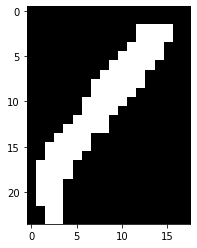

In [ ]:
i = 85
plt.imshow(data1[i],cmap='gray')
print("Dự đoán:",predict(data1[i],19.7))

Dự đoán: 8


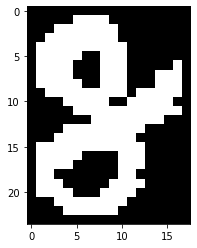

In [ ]:
i = 85
plt.imshow(data8[i],cmap='gray')
print("Dự đoán:",predict(data8[i],19.7))